## PRE-PROCESS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

<ipython-input-2-4f77f82e8c06>:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
pip show catboost

Name: catboost
Version: 1.2
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
meat_data = Path('/content/drive/MyDrive/daging')

In [ ]:
JPG_Path = list(meat_data.glob(r"*/*.jpg"))

In [ ]:
print(JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/daging/Spoiled/test_20171017_194121D.jpg'), PosixPath('/content/drive/MyDrive/daging/Spoiled/test_20171017_220121D.jpg'), PosixPath('/content/drive/MyDrive/daging/Spoiled/test_20171017_193921D.jpg'), PosixPath('/content/drive/MyDrive/daging/Spoiled/test_20171017_215321D.jpg'), PosixPath('/content/drive/MyDrive/daging/Spoiled/test_20171017_220921D.jpg')]


In [ ]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

In [ ]:
print(Labels.count("Fresh"))

948


In [ ]:
print(Labels.count("Spoiled"))

948


In [ ]:
File_Path = pd.Series(JPG_Path,name="JPG").astype(str)

In [ ]:
print(File_Path.head())

0    /content/drive/MyDrive/daging/Spoiled/test_201...
1    /content/drive/MyDrive/daging/Spoiled/test_201...
2    /content/drive/MyDrive/daging/Spoiled/test_201...
3    /content/drive/MyDrive/daging/Spoiled/test_201...
4    /content/drive/MyDrive/daging/Spoiled/test_201...
Name: JPG, dtype: object


In [ ]:
Label_Name = pd.Series(Labels,name="CATEGORY")

In [ ]:
print(Label_Name.head())

0    Spoiled
1    Spoiled
2    Spoiled
3    Spoiled
4    Spoiled
Name: CATEGORY, dtype: object


In [ ]:
Main_Data = pd.concat([File_Path,Label_Name],axis=1)

In [ ]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Data.head())

                                                 JPG CATEGORY
0  /content/drive/MyDrive/daging/Spoiled/test_201...  Spoiled
1  /content/drive/MyDrive/daging/Spoiled/test_201...  Spoiled
2  /content/drive/MyDrive/daging/Spoiled/test_201...  Spoiled
3  /content/drive/MyDrive/daging/Spoiled/test_201...  Spoiled
4  /content/drive/MyDrive/daging/Fresh/test_20171...    Fresh


In [ ]:
Fresh_Meat = Main_Data[Main_Data["CATEGORY"] == "Fresh"]
Spoiled_Meat = Main_Data[Main_Data["CATEGORY"] == "Spoiled"]

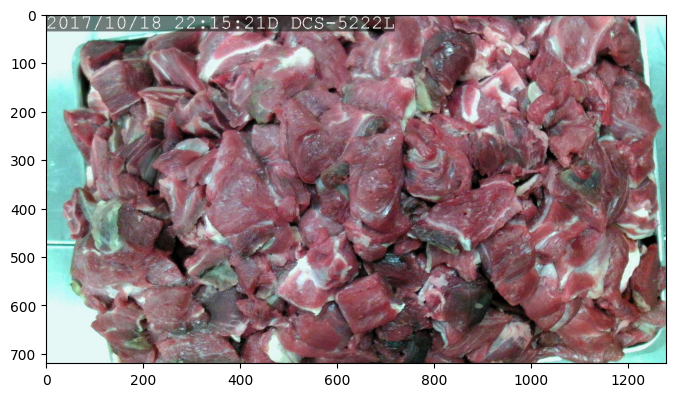

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Data["JPG"][10]))
plt.show()

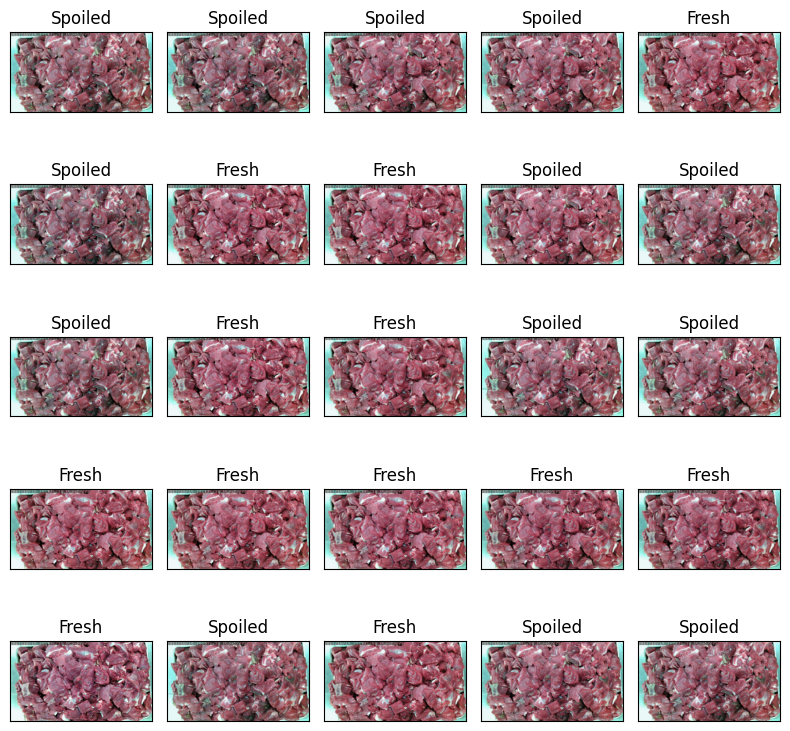

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [ ]:
Train_Data, Test_Data = train_test_split(Main_Data, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
print(Train_Data.shape)

(1516, 2)


In [ ]:
print(Test_Data.shape)

(380, 2)


In [ ]:
#normalisasi data
Data_Generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
Train_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")

Found 1213 validated image filenames belonging to 2 classes.


In [ ]:
Test_Gen = Data_Generator.flow_from_dataframe(dataframe=Test_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=False,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32)

Found 380 validated image filenames belonging to 2 classes.


In [ ]:
print(Test_Gen.classes[0:20])


[0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
print(Test_Gen.split)


None


In [ ]:
Validation_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="validation")

Found 303 validated image filenames belonging to 2 classes.


In [ ]:
print(Validation_Gen.classes[0:20])


[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


In [ ]:
print(Validation_Gen.split)


(0, 0.2)


###MODEL

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(2,activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)


In [ ]:
ANN_Model = model.fit(Train_Gen,
                     validation_data=Validation_Gen,
                     epochs=10,batch_size=5,
                     callbacks=Call_Back)

Epoch 1/10
38/38 [==============================] - 178s 5s/step - loss: 0.6748 - accuracy: 0.6125 - val_loss: 0.5946 - val_accuracy: 0.9505
Epoch 2/10
38/38 [==============================] - 28s 745ms/step - loss: 0.5097 - accuracy: 0.8219 - val_loss: 0.4022 - val_accuracy: 0.7756
Epoch 3/10
38/38 [==============================] - 38s 1s/step - loss: 0.3192 - accuracy: 0.8969 - val_loss: 0.1847 - val_accuracy: 0.9901
Epoch 4/10
38/38 [==============================] - 28s 748ms/step - loss: 0.2393 - accuracy: 0.9143 - val_loss: 0.1364 - val_accuracy: 0.9505
Epoch 5/10
38/38 [==============================] - 31s 808ms/step - loss: 0.1962 - accuracy: 0.9299 - val_loss: 0.1090 - val_accuracy: 0.9505
Epoch 6/10
38/38 [==============================] - 29s 752ms/step - loss: 0.1666 - accuracy: 0.9357 - val_loss: 0.2859 - val_accuracy: 0.9274
Epoch 7/10
38/38 [==============================] - 34s 905ms/step - loss: 0.1553 - accuracy: 0.9316 - val_loss: 0.1356 - val_accuracy: 0.9340
Epoc

CHECK MODEL

In [ ]:
Model_Results = model.evaluate(Test_Gen,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1557
ACCURACY:  0.94


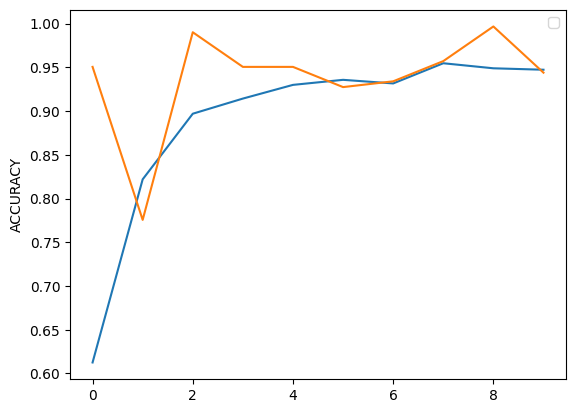

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

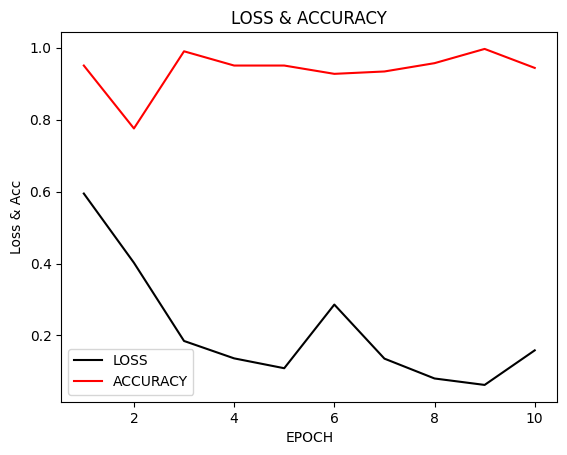

In [ ]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

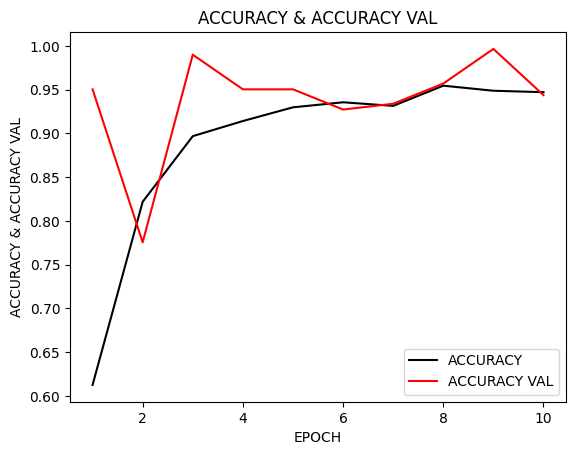

In [ ]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


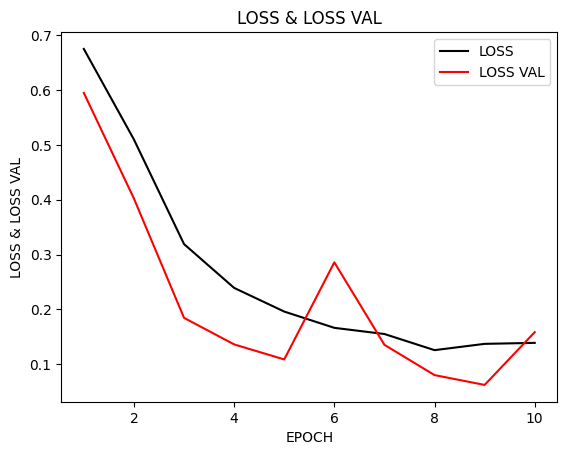

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<Axes: >

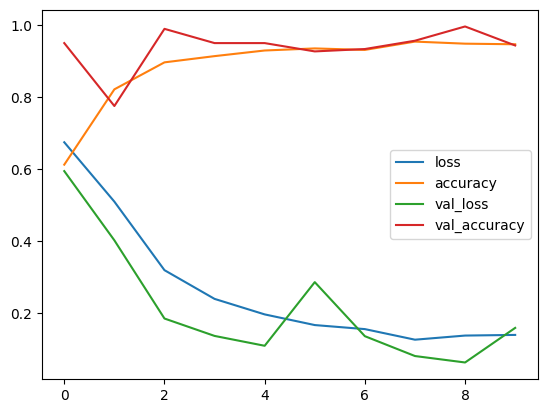

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

###PREDIKSI

In [ ]:
Model_Predict = model.predict(Test_Gen)


12/12 [==============================] - 7s 541ms/step


In [ ]:
Model_Predict = np.argmax(Model_Predict,axis=1)


In [ ]:
Predict_Label = (Test_Gen.class_indices)
Predict_Label = dict((v,k) for k,v in Predict_Label.items())

In [ ]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]


In [ ]:
print(Model_Predict[:10])

['Spoiled', 'Spoiled', 'Spoiled', 'Fresh', 'Fresh', 'Spoiled', 'Fresh', 'Spoiled', 'Spoiled', 'Fresh']


In [ ]:
Test_Results = list(Test_Data["CATEGORY"])

In [ ]:
#Classificaton Report
Class_Report = classification_report(Test_Results,Model_Predict)
print(Class_Report)

              precision    recall  f1-score   support

       Fresh       1.00      0.89      0.94       196
     Spoiled       0.89      1.00      0.94       184

    accuracy                           0.94       380
   macro avg       0.95      0.94      0.94       380
weighted avg       0.95      0.94      0.94       380



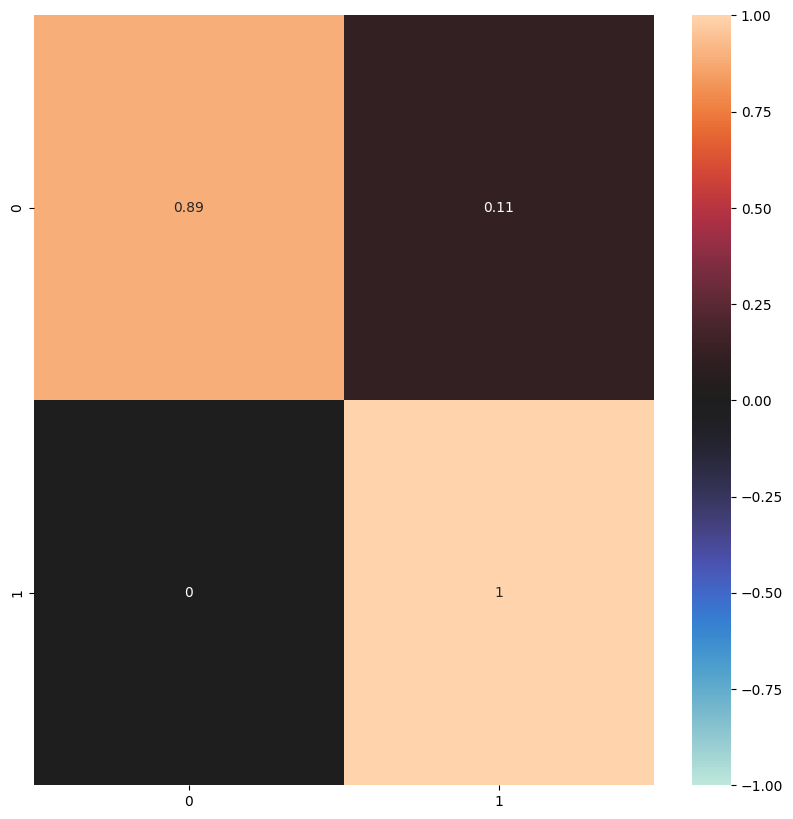

In [ ]:
#Confusion Matrix Report
Conf_Report = confusion_matrix(Test_Results,Model_Predict, normalize="true")
figure = plt.figure(figsize=(10,10))
sns.heatmap(Conf_Report,vmax=1,center=0,vmin=-1,annot=True)
plt.show()


###PREDICTION CHECKING

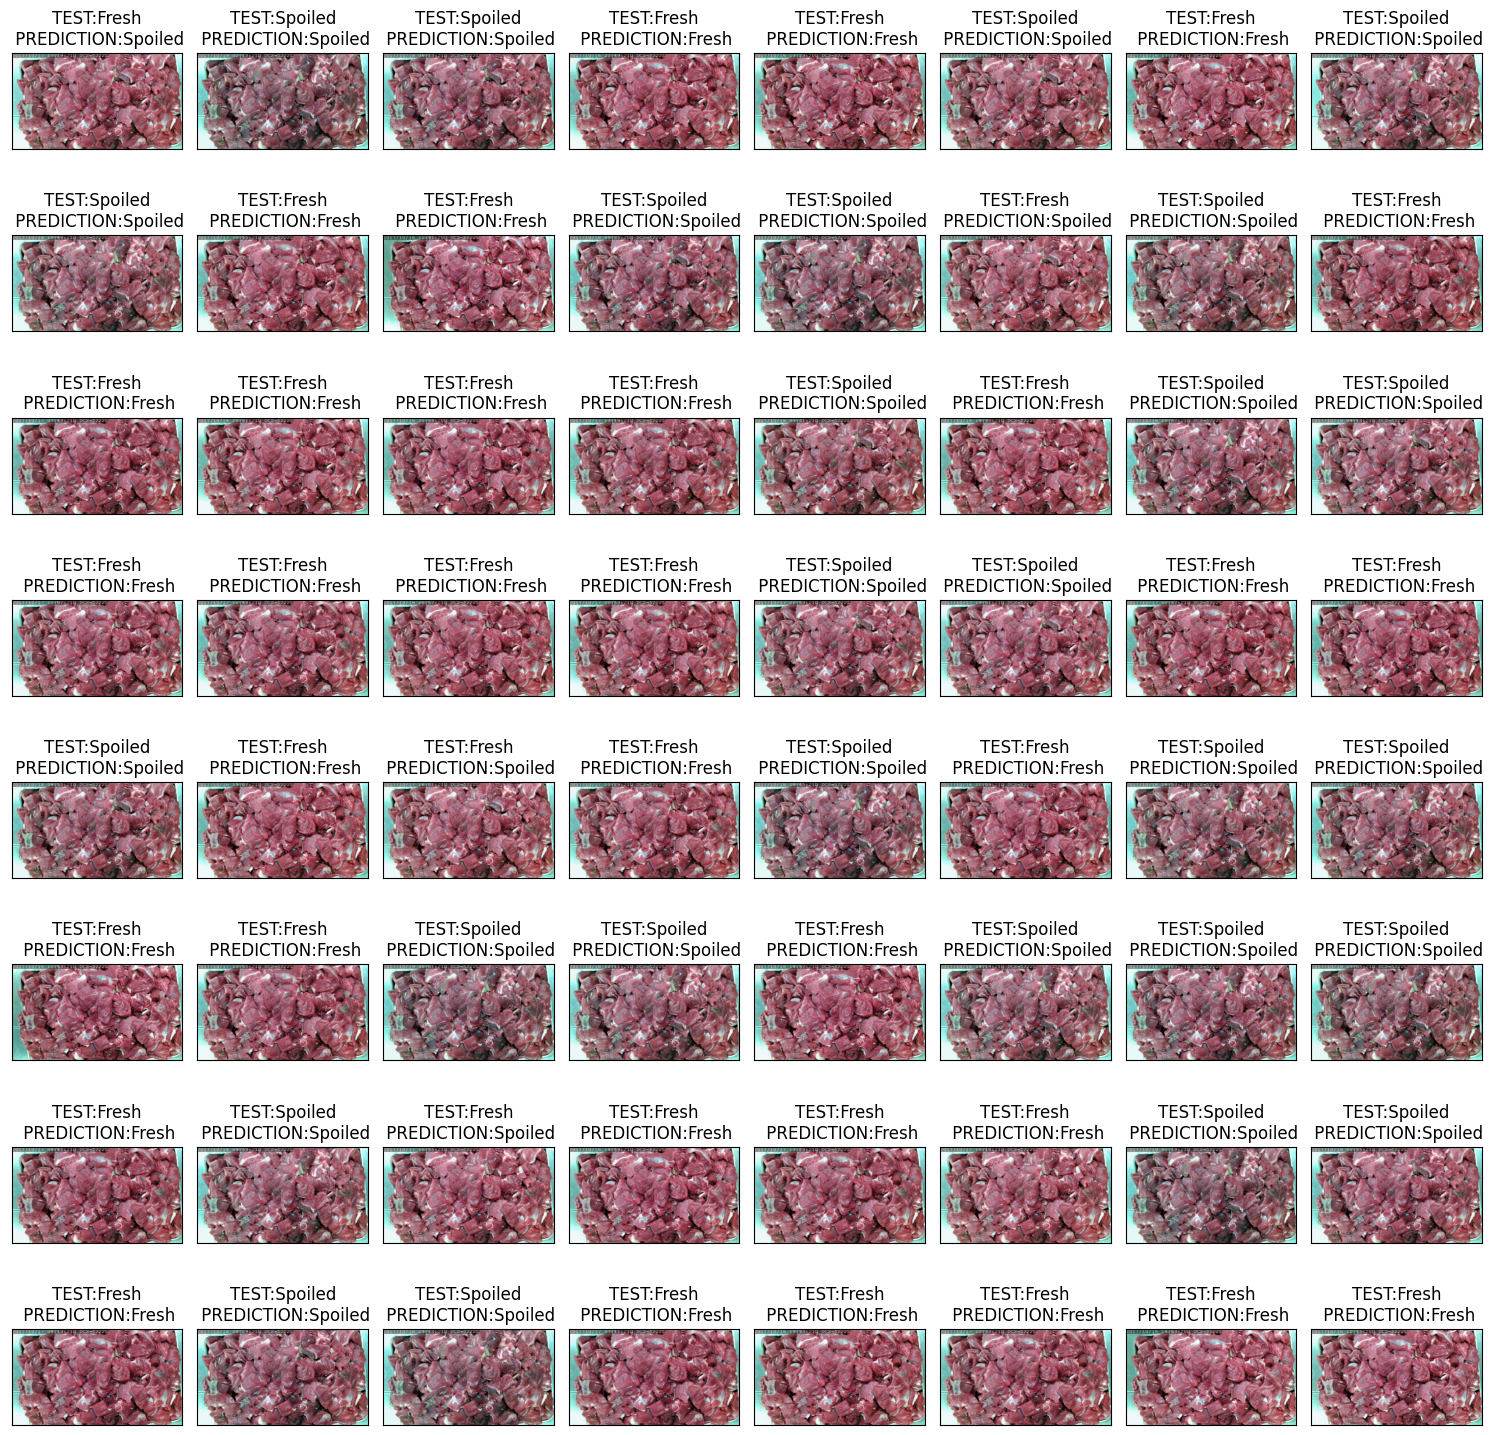

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Model_Predict[i]}")
plt.tight_layout()
plt.show()